<a href="https://colab.research.google.com/github/Chandni0369/ML-LAB-D11ADA-57/blob/main/exp4/ML_exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv("train.csv")
df.head()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cols_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
print(df.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         3
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         3
3         1       1    0  35.0      1      0  53.1000         3
4         0       3    1  35.0      0      0   8.0500         3


In [ ]:
for col in ["Sex", "Embarked"]:
    if col in df.columns:
        df[col] = df[col].fillna("Missing")
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
print(df.head())

for col in ["Age", "Fare"]:
    if col in df.columns:
        imputer = SimpleImputer(strategy="median")
        df[col] = imputer.fit_transform(df[[col]])
print(df.isnull().sum())

y = df["Survived"]
X = df.drop("Survived", axis=1)
print(X.head())
print(y.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         3
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         3
3         1       1    0  35.0      1      0  53.1000         3
4         0       3    1  35.0      0      0   8.0500         3
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         3
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         3
3       1    0  35.0      1      0  53.1000         3
4       3    1  35.0      0      0   8.0500         3
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (712, 7)
Test shape: (179, 7)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179


Confusion Matrix:
 [[98 12]
 [21 48]]


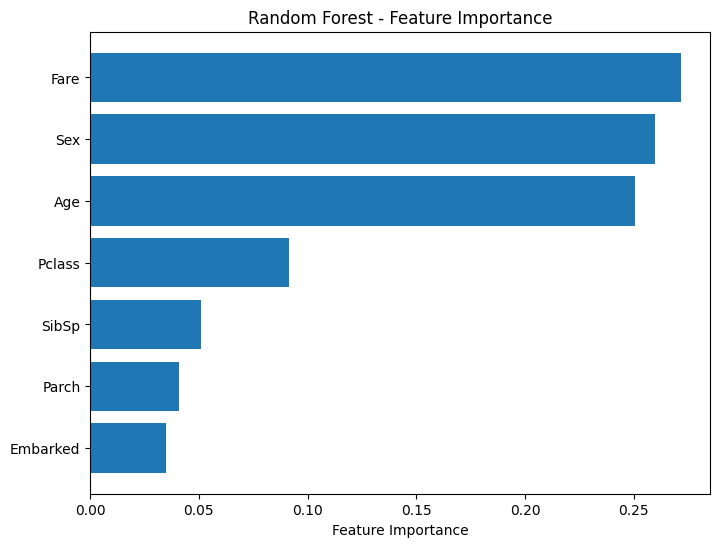

In [ ]:
importances = model.feature_importances_
features = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.barh(range(len(features)), importances[indices], align="center")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.gca().invert_yaxis()
plt.show()
